In [13]:
%matplotlib inline

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import cross_validation

In [15]:
# Load the digits dataset
digits = datasets.load_digits(2)    # load two classes, 0 and 1
data = digits.data
targets = digits.target
n = len(data)

# add one dimention to future vector for bias
ones = np.ones((n, 1))
X = np.hstack((ones, data))

# put labels into variable y
y = targets.reshape(n)
y[y == 0] = -1  # zero to -1

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(X, y)

n_train = len(X_train)
n_valid = len(X_valid)

w = np.zeros_like(X[0])

In [16]:
# parameter
eta = 1
num_iteration = 10

In [17]:
# plot
error_rates_train = []
error_rates_valid = []

for r in range(num_iteration):
    # print "iteration", r
    for xi, yi in zip(X_train, y_train):
        if np.sign(np.dot(xi, w)) != yi:
            w += eta * xi * yi
            # print "w", w[0]

    # train error rate
    xw_t = np.dot(X_train, w)
    predicted_t = np.sign(xw_t)
    error_rate_train = np.sum(predicted_t != y_train) / float(n_train)
    #print "[train] error rate", error_rate_train
    error_rates_train.append(error_rate_train)

    # validation
    xw_v = np.dot(X_valid, w)
    predicted_v = np.sign(xw_v)
    error_rate_valid = np.sum(predicted_v != y_valid) / float(n_valid)
    #print "[valid] error rate", error_rate_valid
    error_rates_valid.append(error_rate_valid)

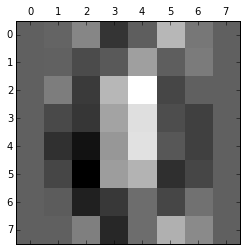

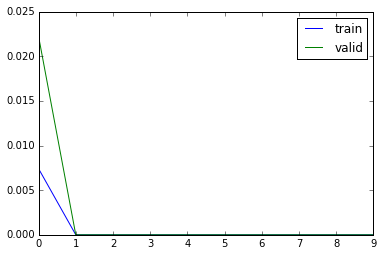

In [18]:
plt.matshow(w[1:].reshape(8, 8), cmap=plt.cm.gray)

plt.figure()
plt.plot(np.arange(num_iteration), np.array(error_rates_train))
plt.plot(np.arange(num_iteration), np.array(error_rates_valid))
plt.legend(['train', 'valid'])
plt.show()